
# Project for Wizeline's Data Engineering Bootcamp

## PAUL RICARDO FELIX TRUJILLO

### Exploratory Analysis

The Customer Service team at Profeco (Mexican Consumer Protection Agency) wants to analyze the monitored products in Mexico.

### Importing libraries

First, I imported all the necessary libraries to work the dataset. In this case panda is the only library imported.

In [ ]:
import pandas as pd

### Review the dataset structure

To know the dataset structure and the possible values in it, I read the first 4 rows and headers. this allows me to find some interesting information like the relationship between the product and its presentation

In [5]:
data_url = 'all_data.csv'
sample_df = pd.read_csv(data_url,nrows=4)
sample_df 

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
0,CUADERNO FORMA ITALIANA,96 HOJAS PASTA DURA. CUADRICULA CHICA,ESTRELLA,MATERIAL ESCOLAR,UTILES ESCOLARES,25.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
1,CRAYONES,CAJA 12 CERAS. JUMBO. C.B. 201423,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,27.5,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
2,CRAYONES,CAJA 12 CERAS. TAMANO REGULAR C.B. 201034,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,13.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
3,COLORES DE MADERA,CAJA 12 PIEZAS LARGO. TRIANGULAR. C.B. 640646,PINCELIN,MATERIAL ESCOLAR,UTILES ESCOLARES,46.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417


### Selecting variables

Because of the size of the dataset, I only chose those columns that are relevant for this analysis. other alternatives would be reading the files with chunks and using libraries like google.colab (drive) linking it into your drive account.

In [6]:
col_list = ["producto","estado","cadenaComercial","presentacion"]
data_url = 'all_data.csv'
df = pd.read_csv(data_url, usecols=col_list)

In [22]:
df.head(5)

,producto,presentacion,cadenaComercial,estado
0,CUADERNO FORMA ITALIANA,96 HOJAS PASTA DURA. CUADRICULA CHICA,ABASTECEDORA LUMEN,DISTRITO FEDERAL
1,CRAYONES,CAJA 12 CERAS. JUMBO. C.B. 201423,ABASTECEDORA LUMEN,DISTRITO FEDERAL
2,CRAYONES,CAJA 12 CERAS. TAMANO REGULAR C.B. 201034,ABASTECEDORA LUMEN,DISTRITO FEDERAL
3,COLORES DE MADERA,CAJA 12 PIEZAS LARGO. TRIANGULAR. C.B. 640646,ABASTECEDORA LUMEN,DISTRITO FEDERAL
4,COLOR LARGO,CAJA 36 PIEZAS. CON SACAPUNTAS. 68-4036,ABASTECEDORA LUMEN,DISTRITO FEDERAL


## Responding the questions:

## Q1 : How many commercial chains are monitored, and therefore, included in this database?

For the first question, que only need to search all the unique values in the <code>"cadenaComercial" </code> column. the command <code>nunique()</code> count the number of unique values in the column.


In [24]:
print("number of commercial chains monitored: ")
df.cadenaComercial.nunique()

number of commercial chains monitored: 


705

## Q2: What are the top 10 monitored products by State?

The following answers show more extensive results. to see all the result, I modified the panda's displays values.

In [9]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

Continuing with the second question, the code group the states with a count group of products to make a list. because <code> value_counts()</code> is already sorted, I just need to adjust the number of entries using <code>head () </code>  with the desired value, in this case 10. 

In [19]:
print("Top 10 products by state")
df.groupby(['estado']).producto.value_counts().groupby(level=0, group_keys=False).head(10)

Top 10 products by state


estado                           producto               
AGUASCALIENTES                   FUD                         12005
                                 DETERGENTE P/ROPA           10188
                                 LECHE ULTRAPASTEURIZADA      9824
                                 SHAMPOO                      9654
                                 REFRESCO                     9481
                                 DESODORANTE                  8859
                                 JABON DE TOCADOR             8517
                                 CHILES EN LATA               7946
                                 YOGHURT                      7401
                                 MAYONESA                     7173
BAJA CALIFORNIA                  REFRESCO                    37243
                                 DETERGENTE P/ROPA           23395
                                 FUD                         19967
                                 SHAMPOO                     19123
     

## Q3: Which is the commercial chain with the highest number of monitored products?

Similar to the last question, making a group of commercial chains with a count group of products (but using <code>count()</code> instead of <code> value_counts()</code> to count all the cells ) give me a list of unique commercial chains and its products. then I reduced the result to 1 and sort it in descending order with <code>.sort_values(ascending=False).head(1)</code> .

In [20]:
print("Commercial chain with the highest number of monitored products:")
df.groupby(['cadenaComercial']).producto.count().sort_values(ascending=False).head(1)

Commercial chain with the highest number of monitored products:


cadenaComercial
WAL-MART    8643133
Name: producto, dtype: int64

## Q4: Use the data to find an interesting fact.

The <code>'presentation'</code> greatly increases the dataset making the type of product more precise. it could be interesting to find which products have the most presentations.

In [17]:
df.groupby(['producto']).presentacion.nunique().sort_values(ascending=False).head(10)

producto
VARIOS                           755
MUÑECAS                          344
PANTALLAS                        257
JUGUETES ARMABLES                214
LAVADORAS                        214
MUÑECOS                          208
TELEVISORES                      173
CAMARAS DIGITALES                168
LIBRO DE TEXTO DE MATEMATICAS    156
COMPONENTES DE AUDIO             147
Name: presentacion, dtype: int64

With the exception of books, products like electronic devices and toys keep the largest number of presentations.


Another piece of information that may be interesting would be to know if the number of commercial chains is similar for each state and if it is not, see their distribution

In [21]:
df.groupby(['estado']).cadenaComercial.nunique().sort_values(ascending=False)

estado
TLAXCALA                           105
JALISCO                             86
DISTRITO FEDERAL                    83
MÉXICO                              80
COAHUILA DE ZARAGOZA                72
SONORA                              72
MICHOACÁN DE OCAMPO                 70
NUEVO LEÓN                          67
QUINTANA ROO                        59
TABASCO                             58
GUANAJUATO                          58
SINALOA                             58
YUCATÁN                             54
HIDALGO                             53
PUEBLA                              53
CHIHUAHUA                           52
QUERÉTARO                           52
VERACRUZ DE IGNACIO DE LA LLAVE     50
AGUASCALIENTES                      47
BAJA CALIFORNIA SUR                 45
BAJA CALIFORNIA                     44
COLIMA                              44
ZACATECAS                           42
OAXACA                              41
TAMAULIPAS                          37
MORELOS           

<AxesSubplot:xlabel='estado'>

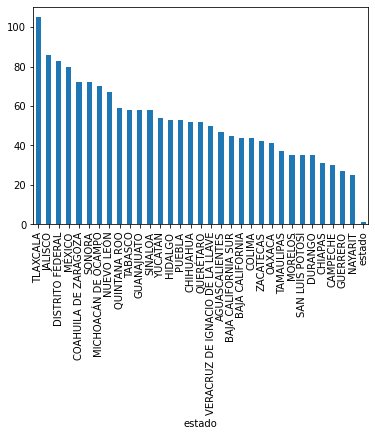

In [23]:
df.groupby(['estado']).cadenaComercial.nunique().sort_values(ascending=False).plot(kind="bar")

Showing entities such as Jalisco and DF with a greater number of monitored commercial chains would be expected, but seeing Tlaxcala as the top could indicate investment projects of commercial chains in this area.

## Q5 What are the lessons learned from this exercise?

Knowing how to manipulate large data sets will be a fundamental part of the analysis processes, especially for national and international companies. Although having knowledge of programming and statistical analysis is important, being able to apply it in large-scale projects becomes just as important.

## Q6: Can you identify other ways to approach this problem? 

Despite the flexibility of python with the use of different libraries to deal with most programming and data manipulation problems, there are more specialized languages that would be a better tool for the user. SQL, for example, is a language specialized in managing relational databases as well as better support in cloud servers that would be convenient to integrate in this Exploratory Analysis.